In [1]:
import os
import logging
import numpy as np
import h5py
import jax
import jax.numpy as jnp
from flax import nnx
from qiimk.crbm import ConditionalRBM, train_crbm

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
logging.basicConfig(level=logging.WARNING)
logging.getLogger('qiimk.crbm').setLevel(logging.DEBUG)

In [2]:
rngs = nnx.Rngs(params=0, sample=1)
model = ConditionalRBM(num_u=28 * 10, num_v=28 * 18, num_h=128, rngs=rngs)

In [3]:
with h5py.File('/data/iiyama/mnist.h5', 'r') as source:
    train_images = source['train_image'][()]
    train_labels = source['train_label'][()]
    test_images = source['test_image'][()]
    test_labels = source['test_label'][()]

train_images = (train_images >= 128).astype(np.uint8).reshape((-1, 28 * 28))
test_images = (test_images >= 128).astype(np.uint8).reshape((-1, 28 * 28))

In [4]:
test_losses = train_crbm(model, train_images, test_images, batch_size=1000, num_epochs=10)

INFO:qiimk.crbm:Starting epoch 0/10
DEBUG:qiimk.crbm:Batch 0/60
DEBUG:qiimk.crbm:Batch 1/60
DEBUG:qiimk.crbm:Batch 2/60
DEBUG:qiimk.crbm:Batch 3/60
DEBUG:qiimk.crbm:Batch 4/60
DEBUG:qiimk.crbm:Batch 5/60
DEBUG:qiimk.crbm:Batch 6/60
DEBUG:qiimk.crbm:Batch 7/60
DEBUG:qiimk.crbm:Batch 8/60
DEBUG:qiimk.crbm:Batch 9/60
DEBUG:qiimk.crbm:Batch 10/60
DEBUG:qiimk.crbm:Batch 11/60
DEBUG:qiimk.crbm:Batch 12/60
DEBUG:qiimk.crbm:Batch 13/60
DEBUG:qiimk.crbm:Batch 14/60
DEBUG:qiimk.crbm:Batch 15/60
DEBUG:qiimk.crbm:Batch 16/60
DEBUG:qiimk.crbm:Batch 17/60
DEBUG:qiimk.crbm:Batch 18/60
DEBUG:qiimk.crbm:Batch 19/60
DEBUG:qiimk.crbm:Batch 20/60
DEBUG:qiimk.crbm:Batch 21/60
DEBUG:qiimk.crbm:Batch 22/60
DEBUG:qiimk.crbm:Batch 23/60
DEBUG:qiimk.crbm:Batch 24/60
DEBUG:qiimk.crbm:Batch 25/60
DEBUG:qiimk.crbm:Batch 26/60
DEBUG:qiimk.crbm:Batch 27/60
DEBUG:qiimk.crbm:Batch 28/60
DEBUG:qiimk.crbm:Batch 29/60
DEBUG:qiimk.crbm:Batch 30/60
DEBUG:qiimk.crbm:Batch 31/60
DEBUG:qiimk.crbm:Batch 32/60
DEBUG:qiimk.crbm:

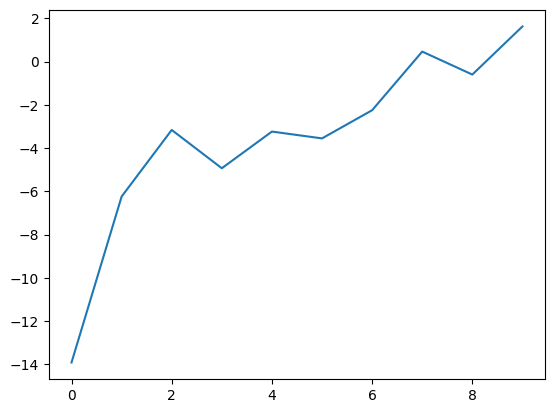

In [5]:
import matplotlib.pyplot as plt

plt.plot(test_losses)

Shouldn't this be going down??

In [13]:
test_u = test_images[:64][:, :280]
predictions = model.percloss_states(test_u, 200)

In [14]:
generated = np.concatenate([test_u, predictions], axis=1).reshape((64, 28, 28))

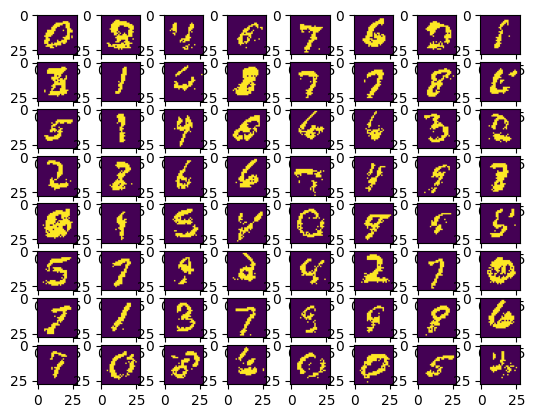

In [17]:
fig, axs = plt.subplots(8, 8)
for iax, ax in enumerate(fig.axes):
    ax.imshow(generated[iax])

0


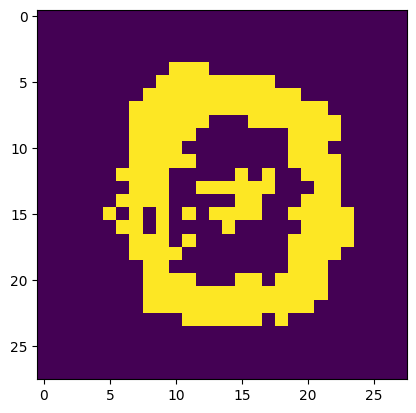

In [11]:
plt.imshow(generated[1])
print(test_labels[1])

4


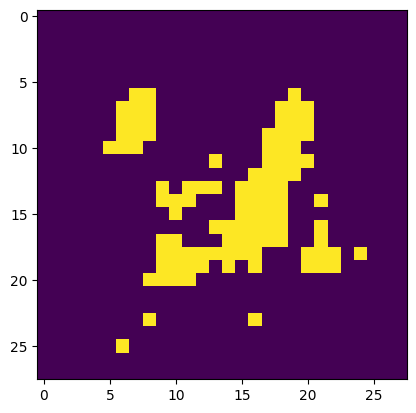

In [12]:
plt.imshow(generated[2])
print(test_labels[2])